In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet50,ResNet152V2
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [15]:
num_classes=2
IMAGE_SIZE = 224
IMAGE_SHAPE = [IMAGE_SIZE, IMAGE_SIZE]
batch_size=2
epochs = 10

In [17]:
resnet = ResNet50(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), weights="imagenet", include_top=False)
for layer in resnet.layers:
    layer.trainable = False
x = Flatten()(resnet.output)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
x = Dense(num_classes, activation="softmax")(x)
model = Model(inputs=resnet.input, outputs=x)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
trdata = ImageDataGenerator()
train_data_gen = trdata.flow_from_directory(directory="./Working/Areca/Train/",target_size=(IMAGE_SIZE,IMAGE_SIZE), shuffle=False, class_mode="categorical")
tsdata = ImageDataGenerator()
test_data_gen = tsdata.flow_from_directory(directory="./Working/Areca/Test/",target_size=(IMAGE_SIZE,IMAGE_SIZE),shuffle=False, class_mode="categorical")

Found 238 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


In [19]:
training_steps_per_epoch = int(np.ceil(train_data_gen.samples / batch_size))
validation_steps_per_epoch = int(np.ceil(test_data_gen.samples / batch_size))

history = model.fit(
    train_data_gen,
    steps_per_epoch=training_steps_per_epoch,
    validation_data=test_data_gen,
    validation_steps=validation_steps_per_epoch,
    epochs=epochs,
    verbose=1
)

print("Training Completed!")

C:\Users\My Pc\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
  8/119 ━━━━━━━━━━━━━━━━━━━━ 4:31 2s/step - accuracy: 0.3568 - loss: 50.6821

C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


119/119 ━━━━━━━━━━━━━━━━━━━━ 43s 224ms/step - accuracy: 0.2395 - loss: 38.2058 - val_accuracy: 0.6133 - val_loss: 3.6817
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 27s 205ms/step - accuracy: 0.6596 - loss: 2.5064 - val_accuracy: 0.5867 - val_loss: 3.1277
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 29s 216ms/step - accuracy: 0.7924 - loss: 1.1633 - val_accuracy: 0.8000 - val_loss: 1.3669
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 229ms/step - accuracy: 0.9675 - loss: 0.1278 - val_accuracy: 0.8667 - val_loss: 0.8843
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 33s 263ms/step - accuracy: 0.9772 - loss: 0.0810 - val_accuracy: 0.8400 - val_loss: 0.8524
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 37s 284ms/step - accuracy: 0.9958 - loss: 0.0144 - val_accuracy: 0.8533 - val_loss: 0.7081
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 46s 331ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.8933 - val_loss: 0.7459
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 63s 486ms/step - accuracy: 1.0000 - loss: 0.0015 - va


Validation Results Summary:
Minimum Validation Loss: 0.6868 at Epoch 10
Maximum Validation Accuracy: 0.8533 at Epoch 7


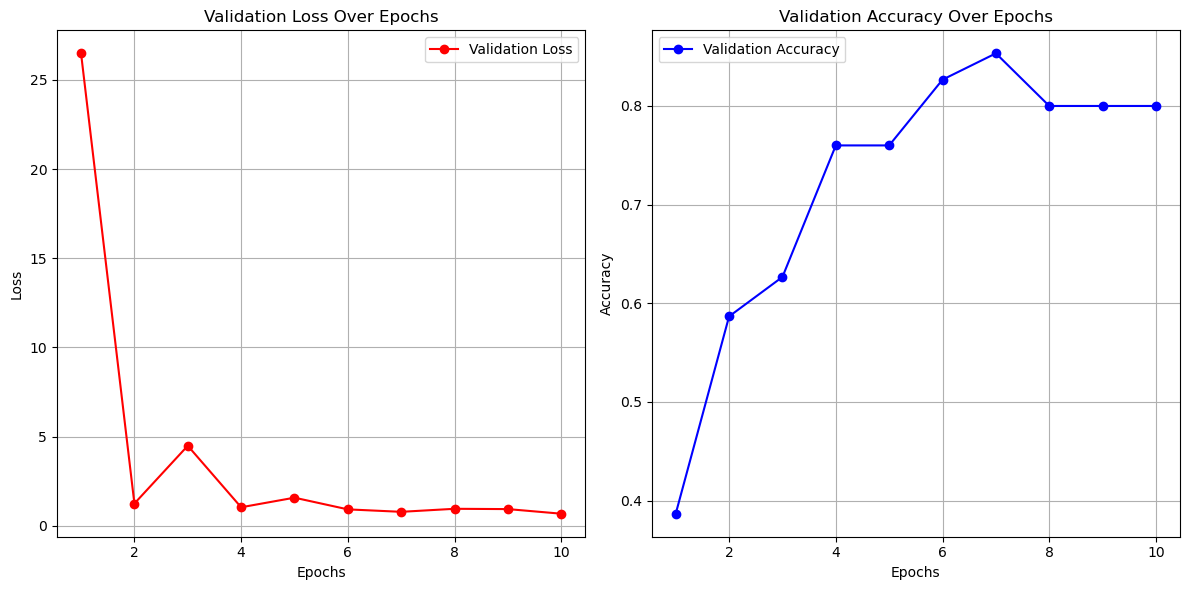

In [6]:
# Validate the presence of validation keys
if 'val_loss' not in history.history or 'val_accuracy' not in history.history:
    print("Validation data not available in history.")
else:
    # Get validation loss and accuracy
    validation_loss = history.history['val_loss']
    validation_accuracy = history.history['val_accuracy']

    # Identify epochs with minimum loss and maximum accuracy
    min_loss_epoch = validation_loss.index(min(validation_loss)) + 1
    max_accuracy_epoch = validation_accuracy.index(max(validation_accuracy)) + 1

    # Print validation results summary
    print("\nValidation Results Summary:")
    print(f"Minimum Validation Loss: {min(validation_loss):.4f} at Epoch {min_loss_epoch}")
    print(f"Maximum Validation Accuracy: {max(validation_accuracy):.4f} at Epoch {max_accuracy_epoch}")

    # Optionally, plot the validation loss and accuracy over epochs
    import matplotlib.pyplot as plt

    # Plot Validation Loss and Accuracy
    epochs_range = range(1, len(validation_loss) + 1)
    plt.figure(figsize=(12, 6))

    # Validation Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, validation_loss, marker='o', label="Validation Loss", color='red')
    plt.title("Validation Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()

    # Validation Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, validation_accuracy, marker='o', label="Validation Accuracy", color='blue')
    plt.title("Validation Accuracy Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step


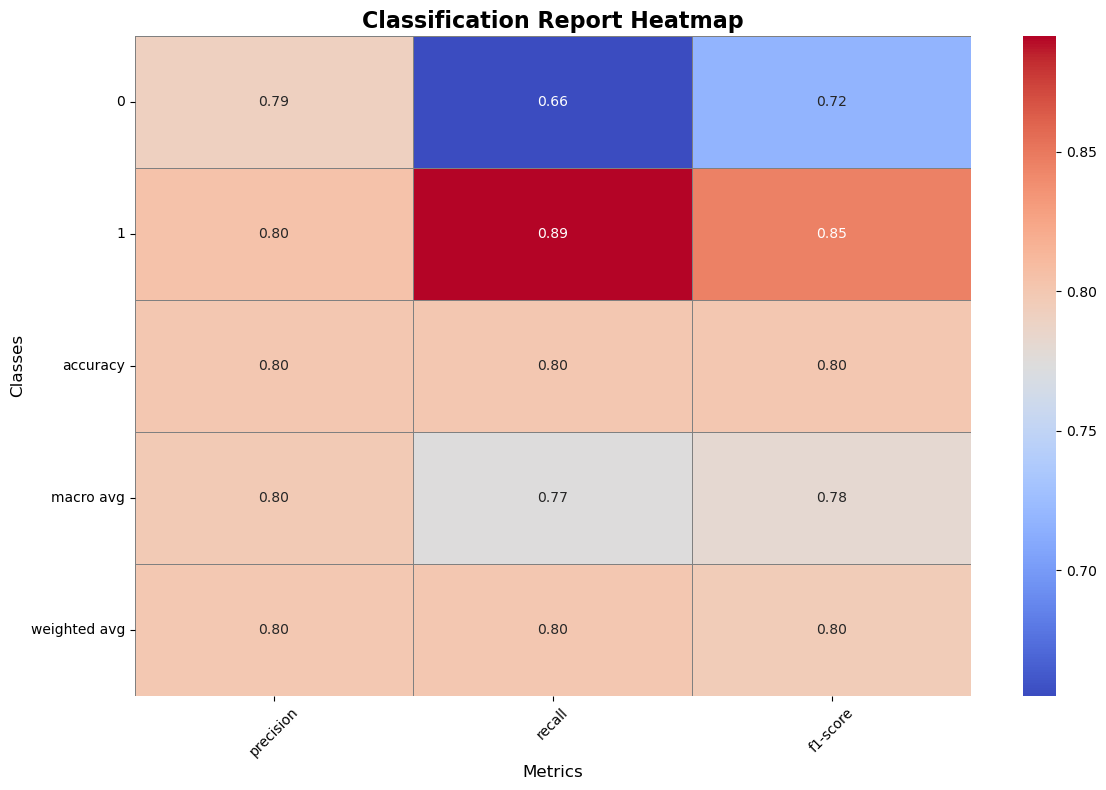


Summary of Key Metrics:
Accuracy: 0.8000
Macro Average F1-Score: 0.7812
Weighted Average F1-Score: 0.7957


In [9]:
# Generate predictions and classification report
Y_pred = model.predict(test_data_gen, steps=test_data_gen.samples // batch_size)
val_preds = np.argmax(Y_pred, axis=1)
val_trues = test_data_gen.classes

# Generate classification report and convert to DataFrame
from sklearn.metrics import classification_report
report_dict = classification_report(val_trues, val_preds, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Highlight macro and weighted averages in the heatmap
sns.heatmap(
    report_df.iloc[:, :-1],  # Exclude the `support` column if needed
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar=True,
    annot_kws={"size": 10},
    linewidths=0.5,
    linecolor="gray"
)

# Customizing the heatmap
plt.title("Classification Report Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adding axis labels
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Classes", fontsize=12)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

# Print summary of key metrics
print("\nSummary of Key Metrics:")
print(f"Accuracy: {report_dict['accuracy']:.4f}")
print(f"Macro Average F1-Score: {report_dict['macro avg']['f1-score']:.4f}")
print(f"Weighted Average F1-Score: {report_dict['weighted avg']['f1-score']:.4f}")


In [18]:
Y_pred = model.predict(test_data_gen, test_data_gen.samples / batch_size)
val_preds = np.argmax(Y_pred, axis=1)
import sklearn.metrics as metrics
val_trues =test_data_gen.classes
from sklearn.metrics import classification_report
print(classification_report(val_trues, val_preds))

3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 7s/step
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.82      0.93      0.87        40

    accuracy                           0.84        68
   macro avg       0.85      0.82      0.83        68
weighted avg       0.84      0.84      0.84        68



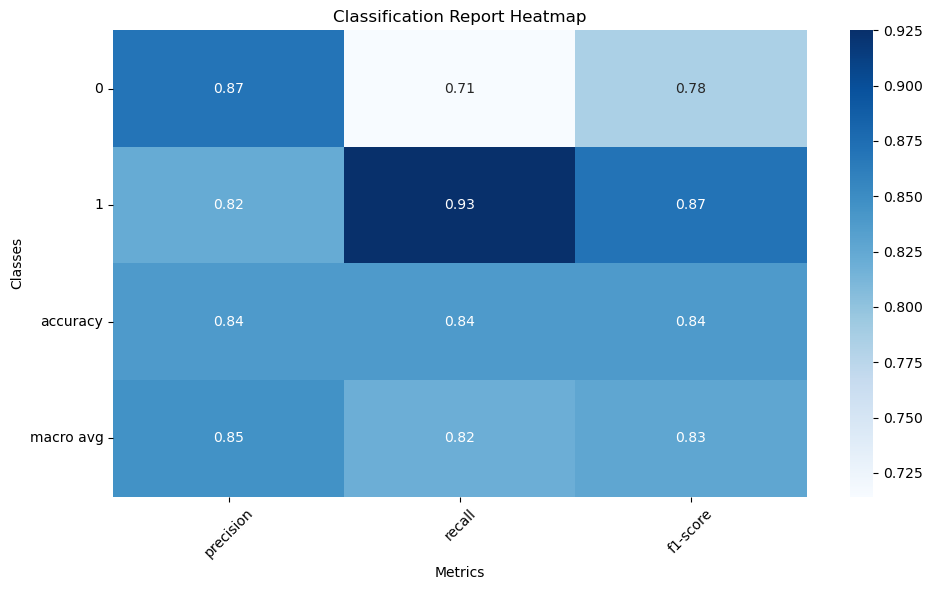

In [20]:
report_df = pd.DataFrame(classification_report(val_trues, val_preds,output_dict=True)).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", cbar=True, annot_kws={"size": 10})

# Customizing the plot
plt.title("Classification Report Heatmap")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.tight_layout()

# Show the plot
plt.show()

## ResNet152V2

In [25]:
resnet = ResNet152V2(input_shape=(224, 224, 3), weights="imagenet", include_top=False)
for layer in resnet.layers:
    layer.trainable = False
x = Flatten()(resnet.output)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
x = Dense(num_classes, activation="softmax")(x)
model = Model(inputs=resnet.input, outputs=x)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=training_steps_per_epoch,
    validation_data=test_data_gen,
    validation_steps=validation_steps_per_epoch,
    epochs=epochs,
    verbose=1
)

print("Training Completed!")

Epoch 1/10
  7/104 ━━━━━━━━━━━━━━━━━━━━ 18:50 12s/step - accuracy: 0.3470 - loss: 8609.4268

C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


104/104 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.1938 - loss: 6540.0747 - val_accuracy: 0.6912 - val_loss: 25.7711
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.4615 - loss: 1090.2223 - val_accuracy: 0.4118 - val_loss: 264.7695
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.3124 - loss: 2031.3046 - val_accuracy: 0.6029 - val_loss: 170.7497
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.6964 - loss: 554.0202 - val_accuracy: 0.4118 - val_loss: 543.4049
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 90s 711ms/step - accuracy: 0.4694 - loss: 403.1446 - val_accuracy: 0.7206 - val_loss: 32.7661
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 72s 613ms/step - accuracy: 0.6095 - loss: 116.4822 - val_accuracy: 0.6029 - val_loss: 142.8466
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 78s 667ms/step - accuracy: 0.7165 - loss: 288.4775 - val_accuracy: 0.4118 - val_loss: 736.9025
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 71s 596ms/step - accuracy: 0.4757